In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def scatter_log_ratio_with_regression(file1, file2):
    # Define column names
    cols = ['Identifier', 'Value1', 'Value2', 'Value3']
    
    # Load data
    try:
        df1 = pd.read_csv(file1, sep='\s+', names=cols, engine='python')
        df2 = pd.read_csv(file2, sep='\s+', names=cols, engine='python')
    except Exception as e:
        print(f"Error loading files: {e}")
        return
    
    # Compute log ratios with error handling
    def compute_log_ratio(df):
        with np.errstate(divide='ignore', invalid='ignore'):
            ratio = df['Value1'] / df['Value2']
            log_ratio = np.log10(ratio)
        df['Log_Ratio'] = log_ratio
        return df
    
    df1 = compute_log_ratio(df1)
    df2 = compute_log_ratio(df2)
    
    # Filter out non-finite log ratios
    df1_filtered = df1[np.isfinite(df1['Log_Ratio'])]
    df2_filtered = df2[np.isfinite(df2['Log_Ratio'])]
    
    # Merge on Identifier
    merged = pd.merge(
        df1_filtered[['Identifier', 'Log_Ratio']],
        df2_filtered[['Identifier', 'Log_Ratio']],
        on='Identifier',
        suffixes=('_file1', '_file2')
    )
    
    # Further ensure no NaN values after merge
    merged = merged.dropna(subset=['Log_Ratio_file1', 'Log_Ratio_file2'])
    
    if merged.empty:
        print("No valid matching data available after filtering.")
        return
    
    x = merged['Log_Ratio_file1']
    y = merged['Log_Ratio_file2']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Plot scatter with regression line
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, alpha=0.7, label='Data Points')
    plt.plot(x, slope*x + intercept, 'r-', label=f'Fit: y={slope:.2f}x+{intercept:.2f}\n$R^2$={r_value**2:.2f}')
    plt.xlabel('log10(f_sel / f_ref) -- $P^2$ pool')
    plt.ylabel('log10(f_sel / f_ref) -- $P^1$ pool')
    
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Print regression details
    print(f"Linear Regression Results:\n"
          f"  Slope: {slope:.4f}\n"
          f"  Intercept: {intercept:.4f}\n"
          f"  R-squared: {r_value**2:.4f}\n"
          f"  p-value: {p_value:.4e}\n"
          f"  Standard error: {std_err:.4f}")


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
/var/folders/4w/gzvp177j2y16550mg65xsbjc0000gn/T/ipykernel_83337/2813136355.py:12: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv(file1, sep='\s+', names=cols, engine='python')
/var/folders/4w/gzvp177j2y16550mg65xsbjc0000gn/T/ipykernel_83337/2813136355.py:13: SyntaxWarning: invalid escape sequence '\s'
  df2 = pd.read_csv(file2, sep='\s+', names=cols, engine='python')


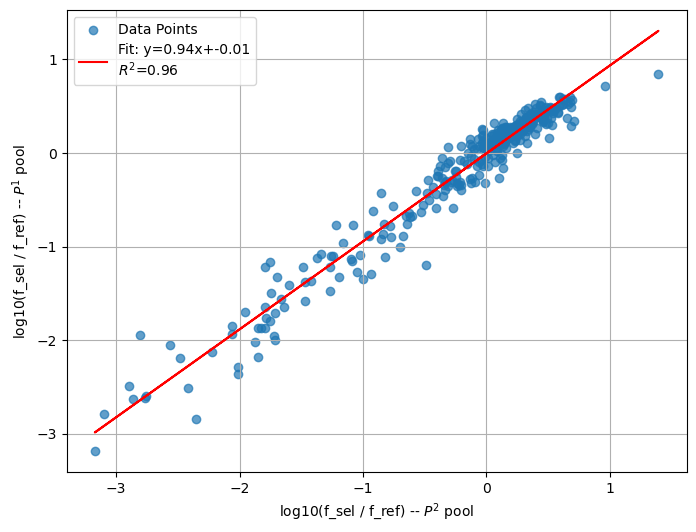

Linear Regression Results:
  Slope: 0.9392
  Intercept: -0.0061
  R-squared: 0.9570
  p-value: 3.2091e-241
  Standard error: 0.0106


In [3]:
scatter_log_ratio_with_regression('EXP1_overlap_activities.dat', 'EXP2_overlap_activities.dat')
